# Gewöhnliche DGL

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy.integrate

Bei gewöhnlichen Differentialgleichungen werden zwei Fälle unterschieden: Anfangswertproblem und Randwertproblem. Für beide gilt, dass die Lösung auf einem Intervall gesucht wird, jedoch wird im ersten Fall nur der Anfangswert vorgegeben und im zweiten Fall die Lösungswerte an den (im eindimensionalen Fall zwei) Randpunkten des Intervalls.

In diesem Kapitel wird nur auf das Anfangswertproblem eingegangen. Als Beispiel dafür und dessen Lösung werden im Folgenden zwei Gleichungen vorgestellt und numerisch gelöst. 

Hinweis: Alle physikalischen Konstanten sind in diesem Kapitel vernachlässigt, um den Fokus auf die numerischen Lösungsmethoden zu setzten.

## Temperaturentwicklung

Im ersten Beispiel wird die zeitliche Temperaturentwicklung $\sf T(t)$ mittels der Gleichung

$$\sf T'(t) = -(T(t)-T_\infty) + Q(t)$$

vorgeschrieben und ein Anfangswert, d.h. $\sf T(t=0) = T_0$, gegeben. Dabei ist $\sf T_\infty$ eine Konstante und $\sf Q(t)$ eine Funktion der Zeit. Die Gleichung beschreibt die Änderung der Temperatur aufgrund des Unterschieds zur Umgebung ($\sf T_\infty$) und eines vorgegebenen Wärmestroms ($\sf Q(t)$).

Die Diskretisierung in der Zeit mit einem frei gewählten $\sf \Delta t$ führt zu folgender Näherung der Ableitung

$$\sf \frac{T^{n+1} - T^n}{\Delta t} = -(T(t)-T_\infty) + Q(t)$$ 

Hierbei wird der Index, welcher der Zeitpunkt angibt, oben aufgeführt. Dies ist eine Konvention, welche später bei partiellen Differentialgleichungen die Indizierung lesbarer macht. 

Die Terme auf der rechnten Seite der Gleichung sind aber noch nicht diskretisiert. Hierbei gibt es zwei Möglichkeiten: die Auswertung zum Zeitpunkt $\sf n$ oder $\sf n+1$. Wird die erste gewählt, so führt dies zum expliziten Euler-Verfahren

$$\sf \frac{T^{n+1} - T^n}{\Delta t} = -(T^n-T_\infty) + Q^n$$

Die zweite Möglichkeit, d.h. die Auswertung der Terme zum Zeitpunkt $\sf n+1$ führt zum impliziten Euler-Verfahren, auf welches hier nicht weiter eingegangen wird.

Die Umformung der Gleichung, welche nach dem expliziten Euler-Verfahren erzeugt wurde, nach dem nächsten Wert der Lösung, d.h. $\sf T^{n+1}$, ergibt

$$ \sf T^{n+1} = T^n -\Delta t (T^n-T_\infty) + Q^n$$

Damit kann mittels der Informationen zum Zeitpunkt $\sf n$ die Lösung zum Zeitpunkt $\sf n+1$ direkt (explizit) berechnet werden. Mit dem vorgegebenen Anfangswert, $\sf T^0 = T_0$ kann der nächste Lösungswert $\sf T^1$, daraus dann $\sf T^2$ und so weiter berechnet werden.

Als erstes Lösungsbeispiel wird 

$$\sf T_0 = 400,\quad T_\infty = 300,\quad Q(t) = 0 $$

gewählt und die Lösung soll bis $\sf t=10$ mit $\sf \Delta t=0.5$ gesucht werden.

In [2]:
# Setzten der Konstanten
T0 = 400
Tinfty = 300
dt = 0.5

In [3]:
# Anlegen des Zeit- und Lösungsarrays
zeit = np.arange(0, 10, dt)
T = np.zeros_like(zeit)

# Setzten des Anfangswerts
T[0] = T0

In [4]:
# Lösung nach dem expliziten Euler-Verfahren
for n in range(0, len(zeit)-1):
    T[n+1] = T[n] - dt * (T[n] - Tinfty)

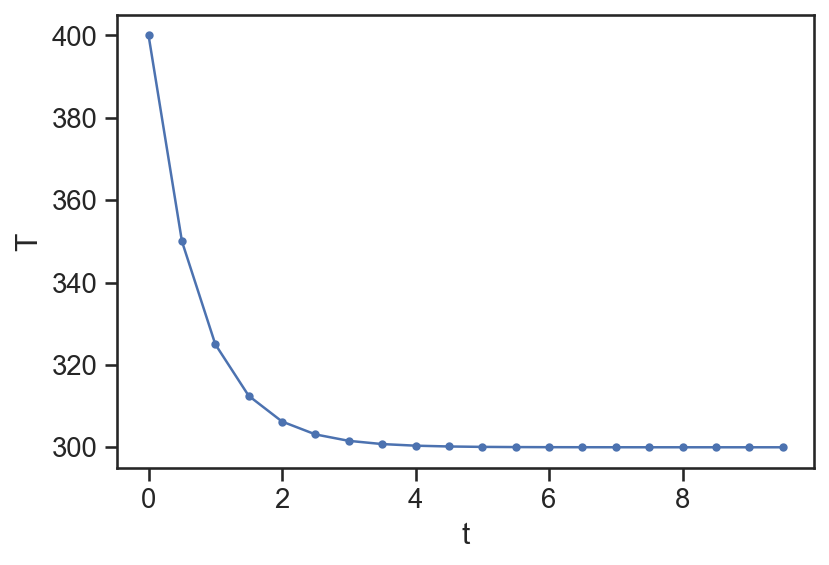

In [5]:
# Visualisierung der Lösung
plt.plot(zeit, T, marker='.')
plt.xlabel("t")
plt.ylabel("T");

Im zweiten Lösungsbeispiel wird nun die Funktion $\sf Q(t)$ als Stufenfunktion hinzugenommen, mit

$$\sf Q(t) = \left\{ \begin{array}{cc} 
                100 & 5 \le t \le 15 \\
                0 & \text{sonst}
                \end{array} \right. $$
                
und die Lösung soll bis $\sf t=25$ berechnet werden.

In [6]:
# Anlegen des Zeit- und Lösungsarrays
zeit = np.arange(0, 25, dt)
T = np.zeros_like(zeit)

# Setzten des Anfangswerts
T[0] = T0

In [7]:
# Lösung nach dem expliziten Euler-Verfahren
for n in range(0, len(zeit)-1):
    t = zeit[n]
    
    # Quellterm Q
    Q = 0
    if t >= 5 and t <= 15:
        Q = 100
    
    # Zeititeration
    T[n+1] = T[n] - dt * (T[n] - Tinfty) + Q

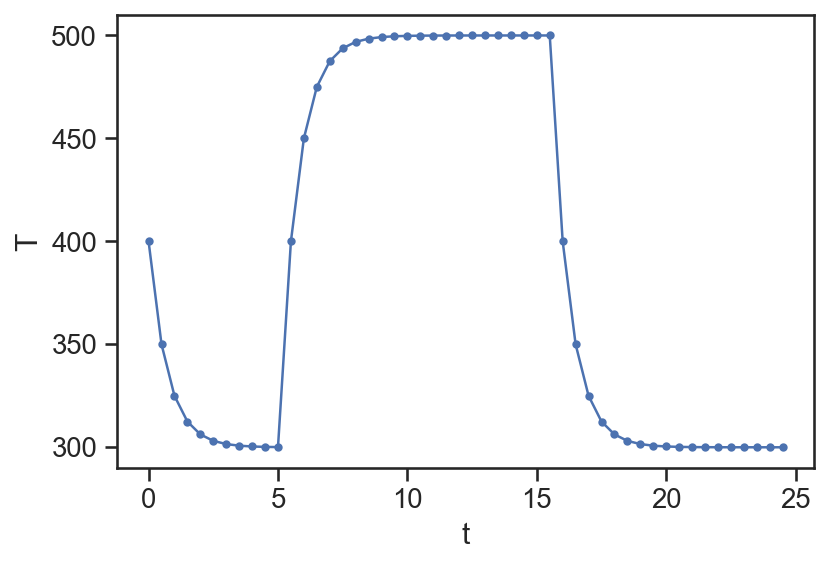

In [8]:
# Visualisierung der Lösung
plt.plot(zeit, T, marker='.')
plt.xlabel("t")
plt.ylabel("T");

## Schwingung

Genauso wie das vorangegangene Beispiel mit der Temperaturentwicklung, kann auch die Gleichung für eine gedämpfte harmonische Schwingung mit dem expliziten Euler-Verfahren gelöst werden. Die gewöhnliche Differentialgleichung zweiter Ordnung für die Auslenkung $\sf u(t)$ lautet

$$ u''(t) + u'(t) + u(t) = 0 $$

Oder als System von zwei Gleichungen erster Ordnung

$$ u'(t) = v(t) $$
$$ v'(t) = -v(t) - u(t) $$

Die diskretisierte Form lautet

$$ u^{n+1} = u^n + \Delta t v^n $$
$$ v^{n+1} = v^n - \Delta t(v^n + u^n) $$

Die Lösung soll mit dem Anfangswerten $\sf u(t=0) = u_0 = 1$ und $\sf v(t=0) = v_0 = 0$ bis zur Zeit $\sf t=25$ mit $\sf \Delta t = 0.25$ berechnet werden.

In [9]:
# Setzten der Konstanten
u0 = 1
v0 = 0
dt = 0.25

In [10]:
# Anlegen des Zeit- und Lösungsarrays
zeit = np.arange(0, 25, dt)
u = np.zeros_like(zeit)
v = np.zeros_like(zeit)

# Setzten der Anfangswerte
u[0] = u0
v[0] = v0

In [11]:
# Lösung nach dem expliziten Euler-Verfahren
for n in range(0, len(zeit)-1):
    u[n+1] = u[n] + dt * v[n]
    v[n+1] = v[n] - dt * (v[n] + u[n])

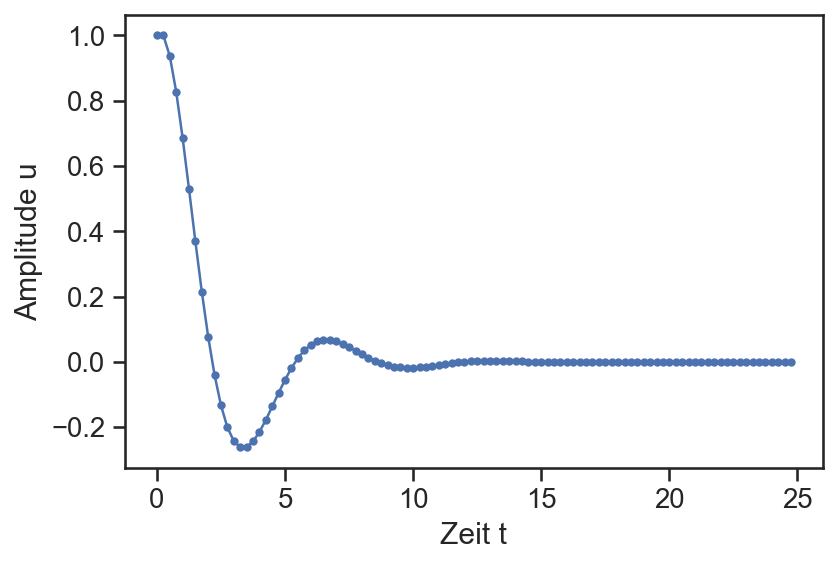

In [12]:
# Visualisierung der Lösung
plt.plot(zeit, u, marker='.')
plt.xlabel("Zeit t")
plt.ylabel("Amplitude u");

## Lösung mit dem scipy-Modul

Das oben vorgestellte Lösungsverfahren mit der expliziten Euler-Methode ist eines der einfachsten Verfahren. Es existieren viele, vor allem bessere, Verfahren zur Lösung von gewöhnlichen Differentialgleichungen, welche hier aber nicht weiter vorgestellt werden. Einige der häufig eingesetzten Löser, wie z.B. das [Runge-Kutta-Verfahren](https://de.wikipedia.org/wiki/Runge-Kutta-Verfahren) sind bereits im scipy-Modul implementiert. Anhand der obigen Anfangswertprobleme, wird deren Verwendung demonstriert.

Die Form, in welcher die zu lösenden Differentialgleichungen erster Ordnung vorliegen müssen ist

$$ y'(t) = f(y(t), t) $$

mit den Anfangsbedingungen für $\sf y(t=0) = y_0$. Dabei wird für $\sf f$ oft der Begriff 'Rechte-Hand-Seite', englisch *right hand side* (RHS), verwendet. Wird ein System von Gleichungen gelöst, so sind $\sf y$ und $\sf f$ entsprechend Vektoren. 

Mit dieser Darstellung lautet die Funktion $\sf f$ für die Temperaturgleichung

$$ f(T(t), t) = -(T(t)-T_\infty) + Q(t)$$


Die Funktion [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) benötigt folgende Informationen für die Lösung der Gleichung

* die Funktion $\sf f$
* das Intervall auf dem die Gleichung gelöst werden soll, d.h. hier $\sf t \in [0, t_{ende}]$
* den Anfangswert $\sf T_0$

Die Funktion $\sf f$ muss dabei als eine Python-Funktion implementiert werden, welche zu gegebenen $\sf t$ und $\sf T$ eine entsprechende Rückgabe liefert. Dabei muss das erste Argument die unabhängige Variable sein, hier die Zeit $\sf t$.

In [13]:
# Definition der Funktion f, d.h. der RHS
def f_T(t, T):
    Tinfty = 300
    Q = 0
    if t >= 5 and t <= 15: 
        Q = 100
    return -(T-Tinfty) + Q

In [14]:
# Definition der Konstanten
t_ende = 25
T0 = 400

Mit diesen Informationen kann nun der Löser aufgerufen werden. Das dabei verwendetet Lösungsverfahren kann mit dem optionalen Argument `method` ausgewählt werden, as Standardwert wird ein Runge-Kutta-Verfahren der fünften Ordnung (`RK45`) verwendet.

In [15]:
# Aufruf des Lösers
res = scipy.integrate.solve_ivp(f_T, [0, t_ende], [T0])
print(res)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 128
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.13,  1.36,  2.51,  3.94,  5.69,  6.99,  8.29,
       10.02, 12.2 , 13.66, 14.53, 15.4 , 16.49, 17.71, 19.17,
       20.99, 23.35, 25.  ])
 t_events: None
        y: array([[400.  , 387.64, 325.86, 308.17, 301.99, 357.47, 388.3 ,
        396.78, 399.38, 399.89, 399.97, 399.99, 366.49, 322.42,
        306.66, 301.58, 300.29, 300.06, 300.01]])
 y_events: None


Die Rückgabe enthält neben dem Lösungsarray (`y`) auch die unabhängige Variable (`t`) als auch weitere Informationen, wie z.B. die Anzahl der Funktionsauswertungen (`nfev`) der Funktion $\sf f$. 

Die graphische Ausgabe ist über die Variablen des Rückgabewerts direkt möglich. Dabei ist zu beachten, dass `res.y` in der allgemeinen Form eines mehrdimiensionalen Arrays vorliegt. In diesem Beispiel, in welchem nur eine Gleichung gelöst wird, muss trotzdem die erste und einzige Komponente der Lösung addressiert werden. 

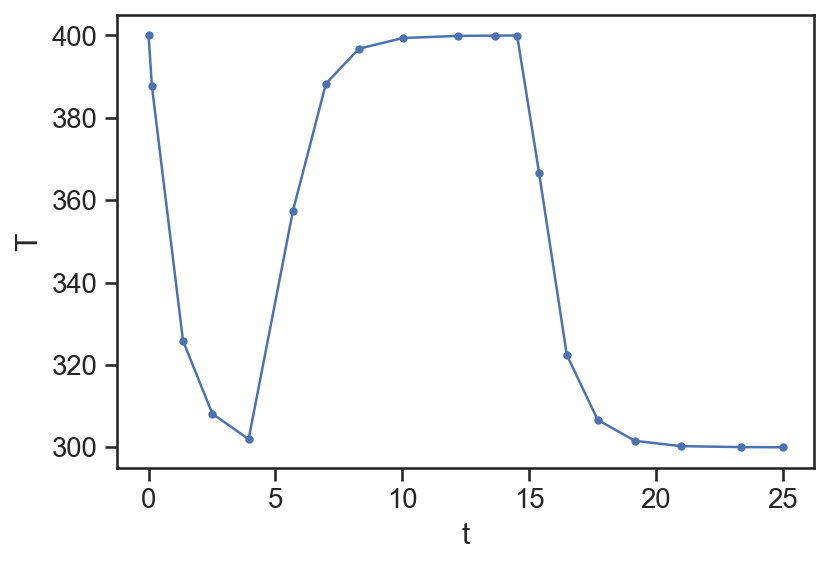

In [16]:
# Visualisierung der Lösung
plt.plot(res.t, res.y[0], marker='.')
plt.xlabel("t")
plt.ylabel("T");

Wie in der obigen Abbildung direkt zu erkennen ist, entspricht die Länge von z.B. `res.y` nicht dem Wert `nfev`. Dies liegt an einer Reduktion der Ausgabepunkte, um den Umfang der Daten zu reduzieren. Die zu übergebenden Argumente können durch das optionale Argument `dense_output` erweitert werden, welche mehr Lösugnspunkte für die Visualisierung zurückgibt.

In [17]:
# Aufruf des Lösers
res = scipy.integrate.solve_ivp(f_T, [0, t_ende], [T0], dense_output=True)
print(res)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 128
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x10f1c0250>
   status: 0
  success: True
        t: array([ 0.  ,  0.13,  1.36,  2.51,  3.94,  5.69,  6.99,  8.29,
       10.02, 12.2 , 13.66, 14.53, 15.4 , 16.49, 17.71, 19.17,
       20.99, 23.35, 25.  ])
 t_events: None
        y: array([[400.  , 387.64, 325.86, 308.17, 301.99, 357.47, 388.3 ,
        396.78, 399.38, 399.89, 399.97, 399.99, 366.49, 322.42,
        306.66, 301.58, 300.29, 300.06, 300.01]])
 y_events: None


Da es sich im Beispiel der Schwingungsgleichung von oben um ein Gleichungssystem handelt, ist die Funktion $\sf \vec{f}$ folgende Vektorform an

$$ \sf \vec{z}(t) =  \left( \begin{array}{c} 
                                u(t)\\
                                v(t) 
                                \end{array} \right) $$
                                
$$ \sf \vec{f}(\vec{z}(t), t) = \left( \begin{array}{c} 
                                v(t)\\
                                -v(t) - u(t) 
                                \end{array} \right) $$
                                


Die Implementierung sieht entsprechend aus:

In [18]:
def f_osz(t, z):
    u = z[0]
    v = z[1]
    # u' 
    up = v
    # v'
    vp = - v - u
    return [up, vp]

Mit den gleichen Konstanten wie oben, kann die scipy-Funktion aufgerufen werden. 

In [19]:
u0 = 1
v0 = 0
z0 = [u0, v0]
t_end = 25

res = scipy.integrate.solve_ivp(f_osz, [0, t_end], z0)
print(res)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 170
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00e+00, 9.99e-04, 1.10e-02, 1.11e-01, 7.52e-01,
       1.60e+00, 2.48e+00, 3.37e+00, 4.25e+00, 5.10e+00,
       5.97e+00, 6.96e+00, 7.85e+00, 8.70e+00, 9.59e+00,
       1.06e+01, 1.15e+01, 1.24e+01, 1.33e+01, 1.44e+01,
       1.55e+01, 1.65e+01, 1.77e+01, 1.90e+01, 2.04e+01,
       2.19e+01, 2.38e+01, 2.50e+01])
 t_events: None
        y: array([[ 1.00e+00,  1.00e+00,  1.00e+00,  9.94e-01,  7.86e-01,
         3.38e-01, -1.67e-02, -1.57e-01, -1.38e-01, -6.63e-02,
        -3.83e-03,  2.52e-02,  2.28e-02,  1.11e-02,  7.49e-04,
        -4.10e-03, -3.67e-03, -1.65e-03,  3.51e-05,  7.00e-04,
         4.89e-04,  1.08e-04, -9.88e-05, -8.41e-05, -6.74e-06,
         1.83e-05,  3.02e-06, -2.38e-06],
       [ 0.00e+00, -9.99e-04, -1.09e-02, -1.05e-01, -4.81e-01,
        -5.10e-01, -2.81e-01, -4.80e-02,  7.10e-02,

Die Visualisierung kann genauso wie oben direkt durchgeführt werden.

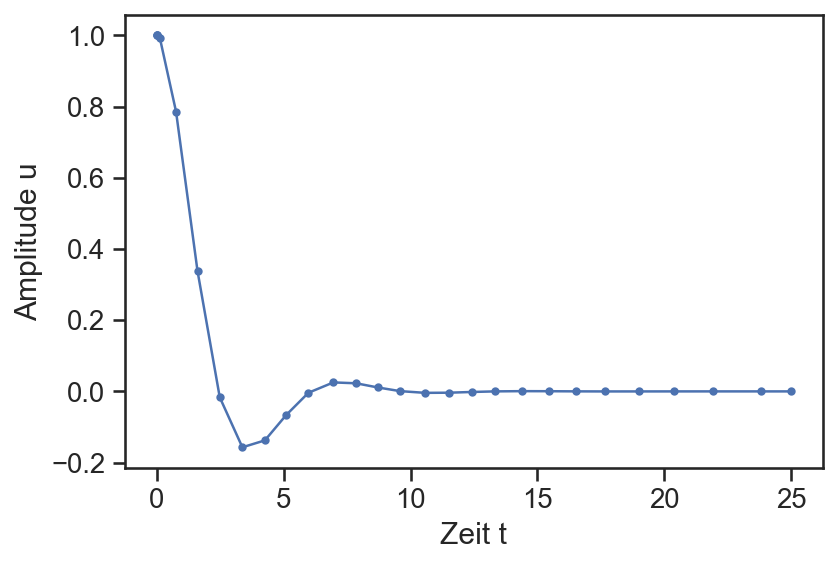

In [20]:
# Visualisierung der Lösung
plt.plot(res.t, res.y[0], marker='.')
plt.xlabel("Zeit t")
plt.ylabel("Amplitude u");

In [21]:
def beam_rhs(x, u):
    y0 = u[0]
    y1 = u[1]
    y2 = u[2]
    y3 = u[3]
    # y' 
    yp = y1
    ypp = y2
    yppp = y3
    ypppp = x*0 - 0.01
    return np.vstack((yp, ypp, yppp, ypppp))

In [22]:
def beam_bc(ya, yb):
#     print(ya, yb)
    return np.array([ya[0]-1, ya[2], yb[0], yb[2]])

In [23]:
x = np.linspace(0,10,25)
y_0 = np.zeros((4, x.size))

res = scipy.integrate.solve_bvp(beam_rhs, beam_bc, x, y_0)
# print(res)

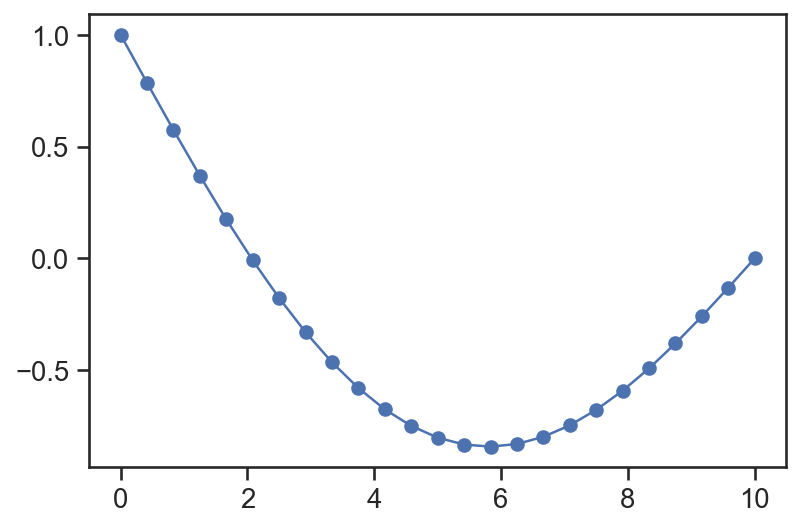

In [24]:
plt.plot(res.x, res.y[0], '-o')